In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
a = pd.read_csv('tt0_2.csv',sep=' ')

In [7]:
a = a.iloc[: ,0:-1 ]

In [8]:
a.to_csv('tt0_2.csv',sep = ' ',index = False)

In [15]:
a = a.iloc[ 1: , : ]

In [18]:
np.shape(a)

(19, 8)

In [30]:
b = a.iloc[ 0:8 : , : ]

In [31]:
b

,zbin1,zbin2,meanz,fout,CORIQRb,CORIQRs,err_CORIQRb,err_CORIQRs
1,0.00,0.30,0.2177,0.2054,0.0066,0.0238,0.0002,0.0005
2,0.15,0.45,0.3219,0.1843,0.0066,0.0258,0.0002,0.0003
3,0.30,0.60,0.4678,0.1317,0.0017,0.0220,0.0001,0.0002
4,0.45,0.75,0.5952,0.0718,0.0003,0.0158,0.0001,0.0001
5,0.60,0.90,0.7379,0.0295,0.0006,0.0150,0.0001,0.0001
6,0.75,1.05,0.8907,0.0337,0.0003,0.0156,0.0001,0.0001
7,0.90,1.20,1.0301,0.0524,0.0009,0.0163,0.0001,0.0001
8,1.05,1.35,1.1959,0.0811,0.0010,0.0222,0.0002,0.0002


In [33]:
b.to_csv('melissa.csv',sep = ' ',index=False)

Text(0, 0.5, 'Mean Redshift (z)')

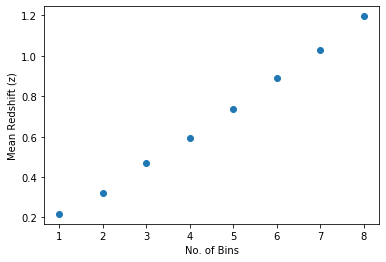

In [32]:
plt.plot(b.meanz, 'o')
plt.xlabel('No. of Bins');plt.ylabel('Mean Redshift (z)')

In [17]:
a.head(3)

,zbin1,zbin2,meanz,fout,CORIQRb,CORIQRs,err_CORIQRb,err_CORIQRs
1,0.00,0.30,0.2177,0.2054,0.0066,0.0238,0.0002,0.0005
2,0.15,0.45,0.3219,0.1843,0.0066,0.0258,0.0002,0.0003
3,0.30,0.60,0.4678,0.1317,0.0017,0.0220,0.0001,0.0002


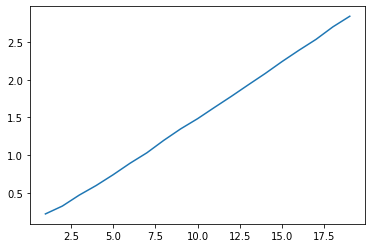

In [34]:
plt.plot(np.linspace(1,19,19), a.meanz )

In [41]:
c = b.iloc[: , [2,4]]

In [42]:
c.to_csv('meliisa_reduced_bias.csv',sep = ' ')

In [43]:
c

,meanz,CORIQRb
1,0.2177,0.0066
2,0.3219,0.0066
3,0.4678,0.0017
4,0.5952,0.0003
5,0.7379,0.0006
6,0.8907,0.0003
7,1.0301,0.0009
8,1.1959,0.0010


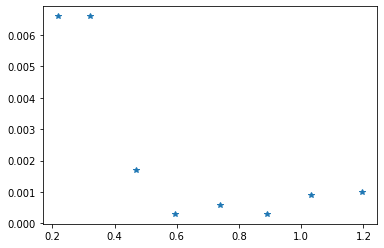

In [46]:
plt.plot(c.meanz, c.CORIQRb, '*')

In [47]:
from scipy.interpolate import interp1d

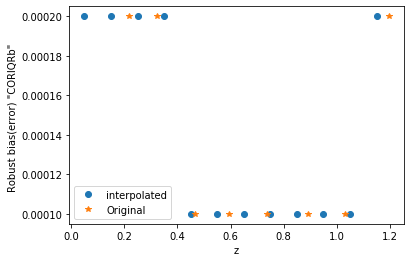

In [84]:
#f2 = interp1d(c.meanz, c.CORIQRb, kind='nearest',fill_value="extrapolate") # nearest
f2 = interp1d(b.meanz, b.err_CORIQRb, kind='nearest',fill_value="extrapolate") # cubic
xnew = np.linspace(0.05,1.15,12, endpoint=True)
#np.linspace(0.05,1.15,12)

plt.plot(xnew,f2(xnew),'o', label = 'interpolated')
#plt.plot(c.meanz, c.CORIQRb, '*', label = 'Original')
plt.plot(b.meanz, b.err_CORIQRb, '*', label = 'Original')
plt.xlabel('z')
plt.ylabel('Robust bias(error) "CORIQRb" ' )
plt.legend()

In [61]:
xnew

array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05,
       1.15])

In [54]:
f2(xnew)

array([-0.01353774,  0.00231648,  0.00728396,  0.00577861,  0.00221434,
        0.00043693,  0.00039008,  0.00059606,  0.00034386,  0.00046088,
        0.00100739,  0.00122472])

In [85]:
inter = np.array(list(zip(xnew,f2(xnew))))

In [86]:
d = pd.DataFrame(inter, columns=['z','bias'])

In [87]:
d.to_csv('interpolated_error.csv',sep = ' ',index = False)

In [88]:
d

,z,bias
0,0.05,0.0002
1,0.15,0.0002
2,0.25,0.0002
3,0.35,0.0002
4,0.45,0.0001
5,0.55,0.0001
6,0.65,0.0001
7,0.75,0.0001
8,0.85,0.0001
9,0.95,0.0001
